
# Project: Investigating The Movie Database (TMDb)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This database consists of data garnered from The movie database (TMDb). It consist of information from over 10,000 movies and for each movie, the information about its runtime, title, release date and year, genres, budget and so on are captured on the database..
>This Database is going to be cleaned thorougly and three research questions will be answered from the database.
1. What Genre has the highest popularity in 2015?
2. What five(5) movies generated the highest Revenue? 
3. What five(5) movies had the highest Budget?
    

In [3]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

in This section i will load the data and scrutinise the data to identify areas that needs cleaning to promote accurate redability. This i will achieve by identifying columns that are not relevant to this analysis, identifying duplicate rows, the distribution of the data as well as the null values etc. 
### General Properties

In [6]:
# Load your data and print out a few lines. 
db_name  = "tmdb-movies.csv"

def get_data(db_name):
    missing_values = ["n/a", "na", "--"," "]
    return pd.read_csv(db_name,na_values = missing_values,sep=",")
df = get_data(db_name)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
# Perform operations to inspect data
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 
#### Based of the outcome of the inspection performed above, the following action will be taken to clean the data.
1. Drop columns that are not relevant to the data analysis operation i want to perform. These columns are: imdb_id, cast, homepage, director, tagline, overview, cast and keywords.
2. Remove duplicate rows in the database.
3. Fill up null values with the mean score or unknown.
4. remove outliers as seen on the runtime column.
5. convert colums showing 'object64' to strings and integers as the case may be. 

In [8]:
# drop unnecessary columns
df.drop (['imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'keywords'], axis=1, inplace=True)

In [9]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#view duplicate rows
df.duplicated().sum()

1

In [11]:
# drop the duplicated rows
df.drop_duplicates(inplace = True)
# confirm that duplicate rows have been dropped
df.duplicated(). sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   runtime               10865 non-null  int64  
 6   genres                10842 non-null  object 
 7   production_companies  9835 non-null   object 
 8   release_date          10865 non-null  object 
 9   vote_count            10865 non-null  int64  
 10  vote_average          10865 non-null  float64
 11  release_year          10865 non-null  int64  
 12  budget_adj            10865 non-null  float64
 13  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB



<a id='eda'></a>
>From the information above, it is clear that the columns that possess null values are genres and production_companies. hence, we will change those values to unknown.

In [13]:
# lets view the sum of the null values
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
# replace null values with unknown
df.genres.fillna('Unknown', inplace=True)
df.production_companies.fillna('Unknown', inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   runtime               10865 non-null  int64  
 6   genres                10865 non-null  object 
 7   production_companies  10865 non-null  object 
 8   release_date          10865 non-null  object 
 9   vote_count            10865 non-null  int64  
 10  vote_average          10865 non-null  float64
 11  release_year          10865 non-null  int64  
 12  budget_adj            10865 non-null  float64
 13  revenue_adj           10865 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


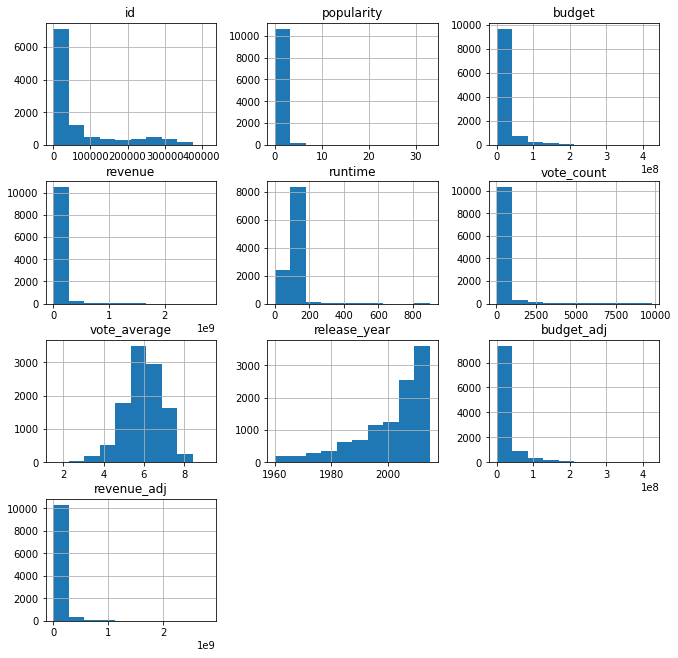

In [16]:
# view the distribution of the entire database
df.hist(figsize = (11, 11));

> From the above distribution, it is clear that revenue, and budjet have a lot of 0 values while runtime has a maximum of 900 which creates outliers. To solve this problem, i will replace rows with 0 values for budjet and revenue with the mean.  Also i will limit runtime to 200 minutes.

In [17]:
# the number of rows and columns for runtime that is above 200 minutes
df[df['runtime']>=200].shape

(74, 14)

In [18]:
# lets drop those outliers for runtime
df.drop(df.query('runtime >= 200').index, inplace=True)

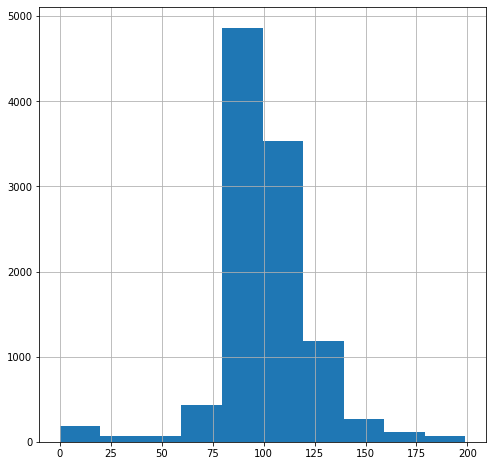

In [19]:
 #view the distribution for runtime on a histogram
df['runtime'].hist(figsize=(8, 8));

In [20]:
# next is to replace rows with 0 values for revenue, popularity and budjet with the average score. First of all, lets view the number of rows.
df[df['revenue']==0].shape

(5953, 14)

In [21]:
df[df['budget']==0].shape

(5641, 14)

In [22]:
# replace the 0 values with the mean
df.budget.replace(0,df.budget.mean(), inplace=True)
df.revenue.replace(0,df.revenue.mean(), inplace=True)

In [23]:
# confirm replacement
df[df['revenue']==0].shape
df[df['budget']==0].shape

(0, 14)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10791 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10791 non-null  int64  
 1   popularity            10791 non-null  float64
 2   budget                10791 non-null  float64
 3   revenue               10791 non-null  float64
 4   original_title        10791 non-null  object 
 5   runtime               10791 non-null  int64  
 6   genres                10791 non-null  object 
 7   production_companies  10791 non-null  object 
 8   release_date          10791 non-null  object 
 9   vote_count            10791 non-null  int64  
 10  vote_average          10791 non-null  float64
 11  release_year          10791 non-null  int64  
 12  budget_adj            10791 non-null  float64
 13  revenue_adj           10791 non-null  float64
dtypes: float64(6), int64(4), object(4)
memory usage: 1.2+ MB


> Finally, for the cleaning process i will need to convert the data types of budget, revenue and popularity from float to integer while release_date will be converted to datetime.

In [25]:
# convert datatypes
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['popularity'] = df['popularity'].astype(int)

In [26]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [27]:
df.dtypes

id                               int64
popularity                       int32
budget                           int32
revenue                          int32
original_title                  object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [28]:
# I'll drop budget_adj and revenue_adj column because they are not relevant to the research
# drop unnecessary columns
df.drop (['budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [29]:
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

> Hence the data cleaning process has been completed, three research questions will be answered with the statistics computed and the results visualised appropriately. The research questions are:
1. What Genre has the highest popularity in 2015
2. What five(5) movies generated the highest Revenue?
3. What five(5) movies had the highest Budget?

### Research Question 1 (what Genre has the highest popularity in 2015?)

> In this database, there is a column that shows the genres where each movie falls into, a single movie can have up to two or more genres associated to it and a particular genre can be associated with different movies across different years. hence, this research question seeks to understand the genre with the highest popularity in 2015.To answer this question, the first thing we need to do is to seperate the genres. Looing at the genres column, we can see that the genres are seperated with a pipe and each movie falls under two or more genres.

In [30]:
# create a copy of the dataframe
genres_list = df.copy()
genres_list

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0,14664940,39958909,The Endless Summer,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966
10862,20379,0,14664940,39958909,Grand Prix,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966
10863,39768,0,14664940,39958909,Beregis Avtomobilya,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966
10864,21449,0,14664940,39958909,"What's Up, Tiger Lily?",80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966


In [31]:
 # split the genres column
genres_list.genres = genres_list.genres.str.split('|')

In [32]:
#read the first five rows of the genres column
genres_list.genres.head()

0    [Action, Adventure, Science Fiction, Thriller]
1    [Action, Adventure, Science Fiction, Thriller]
2            [Adventure, Science Fiction, Thriller]
3     [Action, Adventure, Science Fiction, Fantasy]
4                         [Action, Crime, Thriller]
Name: genres, dtype: object

In [33]:
# Split the list of genres per movie so that it would have its own separate row and movies would repeat themselves for every different genre.
genres_list = genres_list.explode('genres')

In [34]:
# Select only rows where release_year is 2015
genres_list= genres_list[genres_list["release_year"].isin([2015])]
genres_list

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32,150000000,1513528810,Jurassic World,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
0,135397,32,150000000,1513528810,Jurassic World,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
0,135397,32,150000000,1513528810,Jurassic World,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
0,135397,32,150000000,1513528810,Jurassic World,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28,150000000,378436354,Mad Max: Fury Road,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
624,339928,0,14664940,732655,Once I Was a Beehive,119,Family,Escapology|Main Dog Productions,2015-08-14,10,6.5,2015
625,367735,0,14664940,39958909,John Mulaney: The Comeback Kid,62,Comedy,3 Arts Entertainment|Irwin Entertainment,2015-11-13,19,6.7,2015
626,266764,0,14664940,39958909,Meet the Patels,88,Documentary,Unknown,2015-09-11,20,6.7,2015
627,328346,0,14664940,39958909,I Hate Christian Laettner,90,Documentary,Unknown,2015-03-15,10,6.7,2015


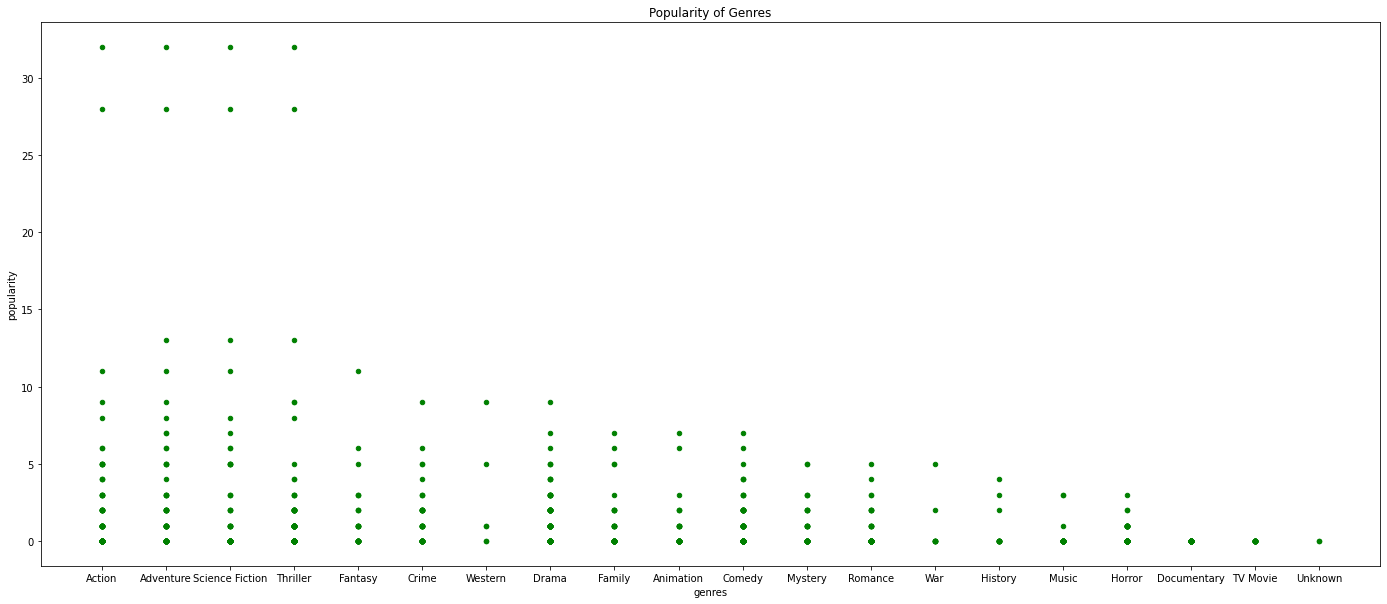

In [57]:
# Create a plot to view the relationship between genres and popularity in 2015
genres_list.plot.scatter(x="genres", y="popularity", figsize = (24, 10), color = 'green')
plt.title('Popularity of Genres')
plt.show();

>**Findings**: Based on our findings, it is clear that the genre 'adventure' had the highest popularity in 2015.

### Research Question 2  (What five(5) movies generated the highest revenue?)

> Each movie has a paticular amount of money that it generate. This question seeks to check out the first 5 movies that generated the highest revenue. To answer this question, first of all we need to arrange the revenue column in descending order then select the first 5 movies with the highest revenue. After which, our data will be visualised for clarity.

In [36]:
# arrange the revenue column in descending order and view the first 5 rows 
revenue_sort=df.sort_values('revenue', ascending=False)
movie_revenue=revenue_sort.head()
movie_revenue

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
3,140607,11,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
5231,597,4,200000000,1845034188,Titanic,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997
4361,24428,7,220000000,1519557910,The Avengers,143,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012
0,135397,32,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
4,168259,9,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [45]:
# extract the original_title and revenue column.
revenue_plot=movie_revenue[['original_title', 'revenue']]
revenue_plot

,original_title,revenue
3,Star Wars: The Force Awakens,2068178225
5231,Titanic,1845034188
4361,The Avengers,1519557910
0,Jurassic World,1513528810
4,Furious 7,1506249360


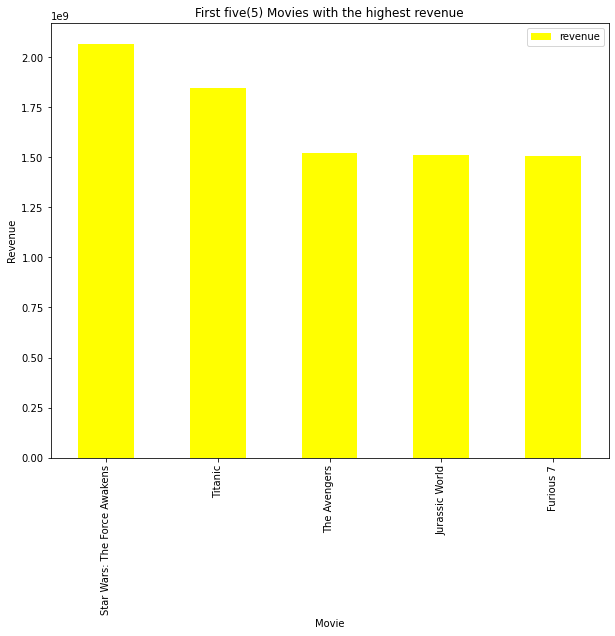

In [61]:
# plot a bar chart based on the extracted data to view relationship between variables
revenue_plot.plot.bar(x="original_title",y='revenue', title = 'First five(5) Movies with the highest revenue',
figsize=(10, 8),
ylabel="Revenue", 
xlabel = "Movie",color="yellow");
plt.legend();

>**Findings:** From our findings, the first 5 movies that generated the highest revenue are: Star Wars, Titanic, The Avengers, Jurassic World and Furious 7.

### Research Question 3  (What five(5) movies had the highest budget?)
>Each movie has a paticular amount of money allocated to its entire production and marketing which is the budget. This question seeks to check out the first 5 movies that had the highest budget. To answer this question, first of all we need to arrange the budget column in descending order then select the first 5 movies with the highest budget. After which, our data will be visualised for clarity.

In [49]:
# arrange the revenue column in descending order and view the first 5 rows 
budget_sort=df.sort_values('budget', ascending=False)
movie_budget=budget_sort.head()
movie_budget

,id,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
2244,46528,0,425000000,11087569,The Warrior's Way,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010
3375,1865,4,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011
7387,285,4,300000000,961000000,Pirates of the Caribbean: At World's End,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007
14,99861,5,280000000,1405035767,Avengers: Age of Ultron,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015
6570,1452,1,270000000,391081192,Superman Returns,154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,2006-06-28,834,5.3,2006


In [50]:
# extract the original_title and budget column.
budget_plot=movie_budget[['original_title', 'budget']]
budget_plot

,original_title,budget
2244,The Warrior's Way,425000000
3375,Pirates of the Caribbean: On Stranger Tides,380000000
7387,Pirates of the Caribbean: At World's End,300000000
14,Avengers: Age of Ultron,280000000
6570,Superman Returns,270000000


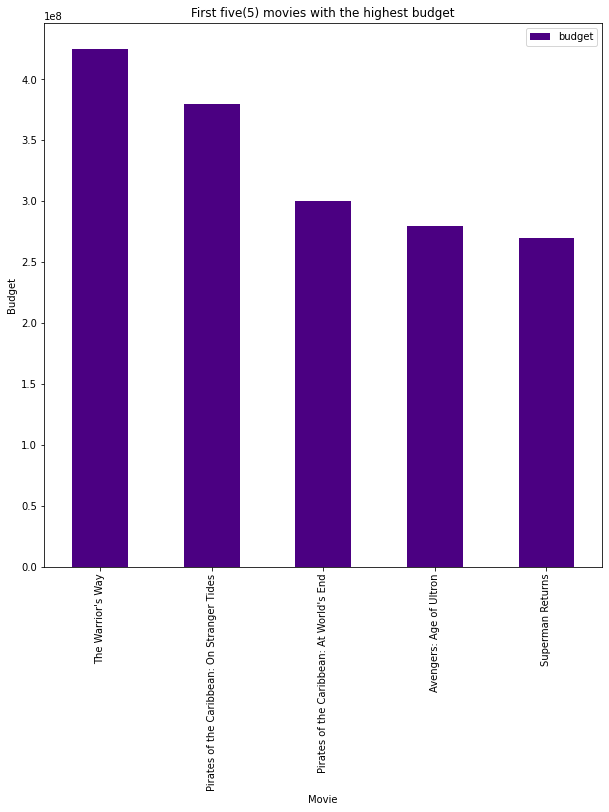

In [60]:
# plot a bar chart based on the extracted data to view relationship between variables
budget_plot.plot.bar(x="original_title",y='budget', title= 'First five(5) movies with the highest budget',
figsize=(10, 10),
ylabel="Budget", 
xlabel = "Movie",color="indigo")
plt.legend();

>**Findings:** From our findings, the first 5 movies that generated the highest revenue are: The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron and Superman Returns.

<a id='conclusions'></a>
## Conclusions

> Finally, the summary of my findings clearly shows that:
1. The genre 'adventure' had the highest popularity in 2015
2. The first 5 movies that generated the highest revenue are: Star Wars, Titanic, The Avengers, Jurassic World and Furious 7.
3.  The first 5 movies that generated the highest revenue are: The Warrior's Way, Pirates of the Caribbean: On Stranger Tides, Pirates of the Caribbean: At World's End, Avengers: Age of Ultron and Superman Returns.

##  Limitations to the study.
> The Budget and revenue column had quite a lot of 0 values, hence these values were replaced by the mean values respectively. This can obviously affect accuracy.
